# Importing training set and important libraries

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bm=pd.read_csv('datasets/Train_UWu5bXk.csv')

# Statistical EDA 

In [85]:
print(bm.head(10))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  1

In [86]:
print(bm.shape)

(8523, 12)


In [87]:
print(bm.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [88]:
print(bm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None


From statistical eda we find that there are 8523 rows and 12 columns. And some of the colums have some missing values present there.And also minimum of Item_visibility is zero which is not possible if item is inn sale it will have some visibility so we will replace 0 by mean of all entries

# Graphical EDA

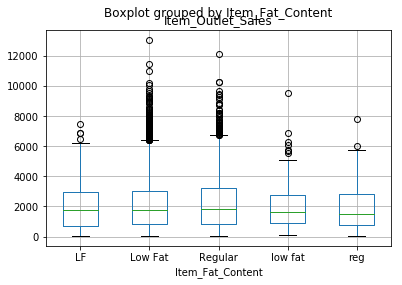

In [89]:
bm.boxplot(by='Item_Fat_Content',column='Item_Outlet_Sales')

Here we can see that the mean of different type of Fat Content is almost same . And hence there is no relationship between Fat content and sales.

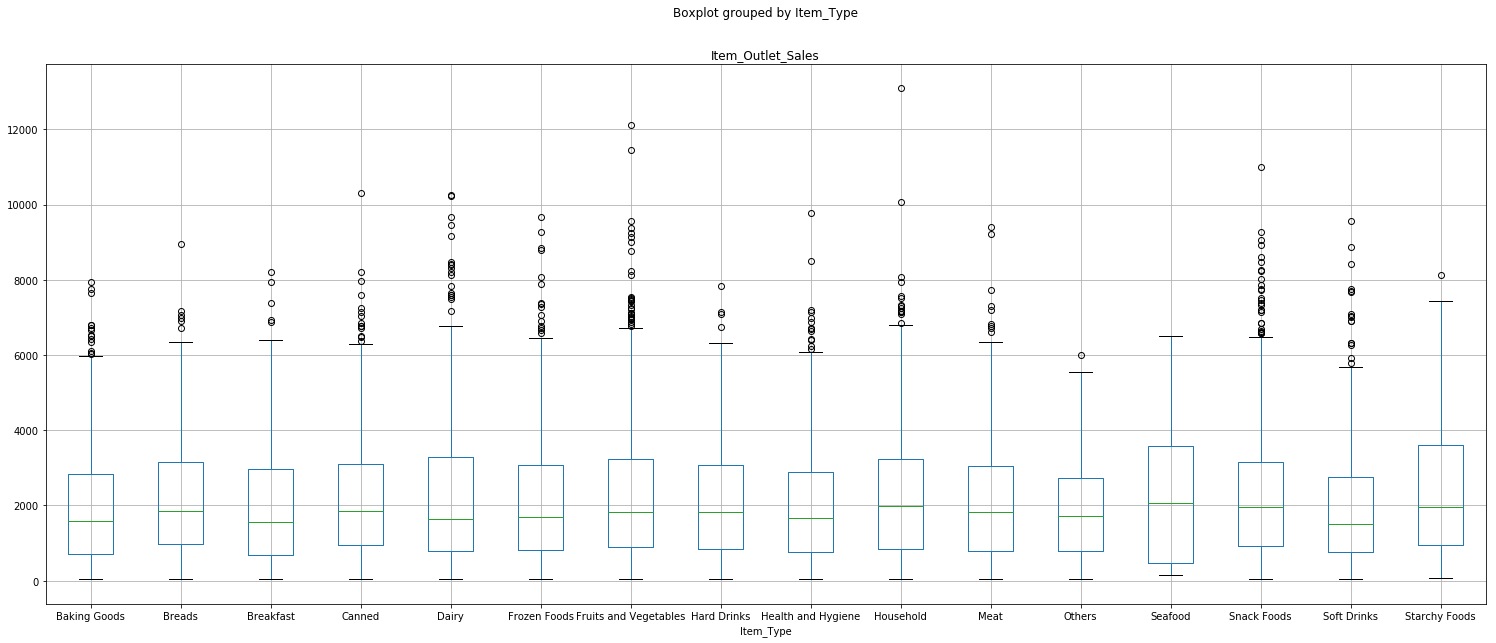

In [90]:
bm.boxplot(by='Item_Type',column='Item_Outlet_Sales',figsize=(25,10))

We can say that sales is not effected by the type of item . However sales of Baking Good,Breakfast,Soft drinks are slightly lower

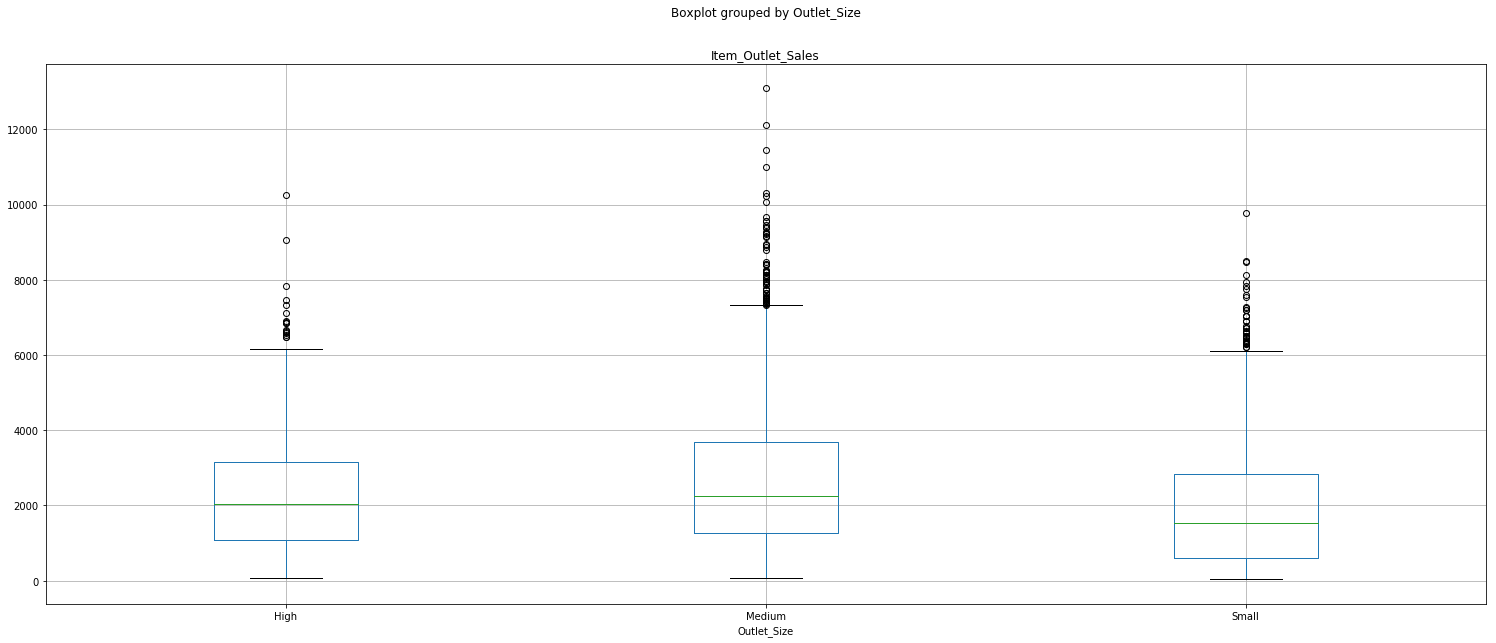

In [91]:
bm.boxplot(by='Outlet_Size',column='Item_Outlet_Sales',figsize=(25,10))

unexpectedly sales of medium size outlet is slightly higher than high size outlets and some sales in medium size outlet are more than high and small size outlet . They are outliers but we have no evidence that these are bad data points it can be happen.

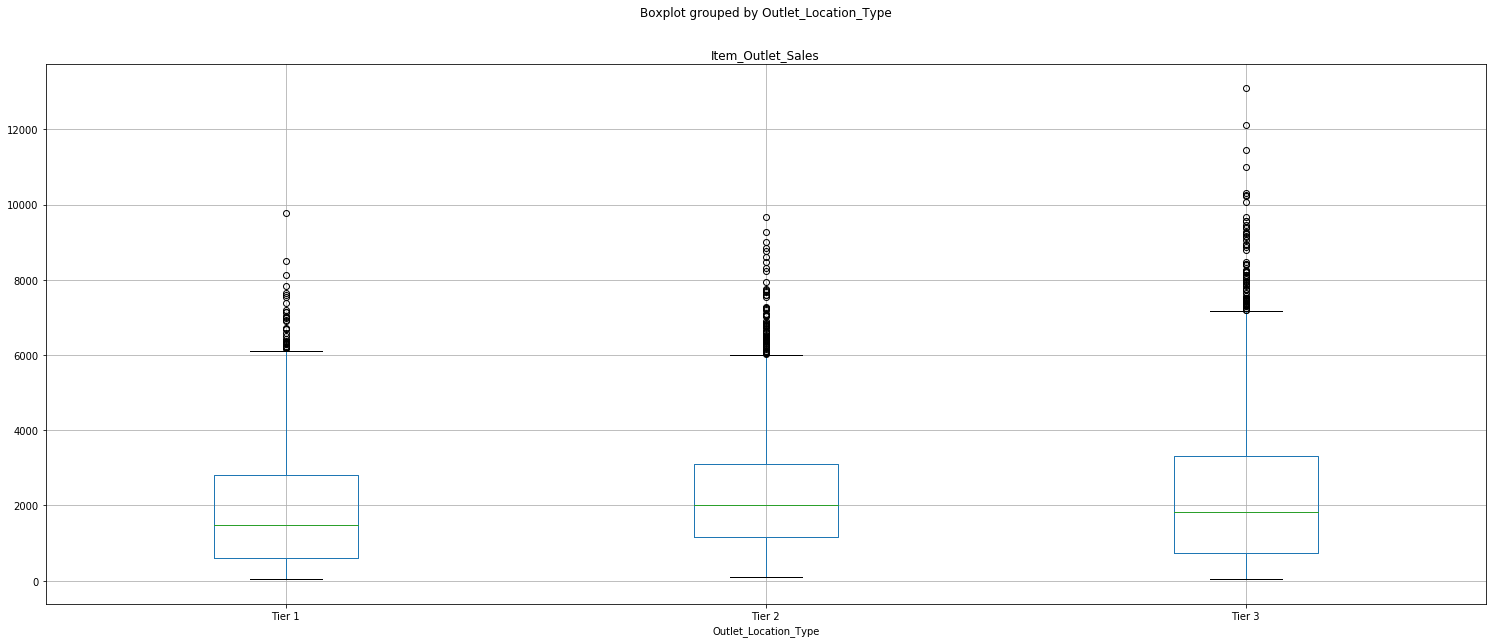

In [92]:
bm.boxplot(by='Outlet_Location_Type',column='Item_Outlet_Sales',figsize=(25,10))

From the above given boxplot we can draw conclusion that sales is independent of location of store . 

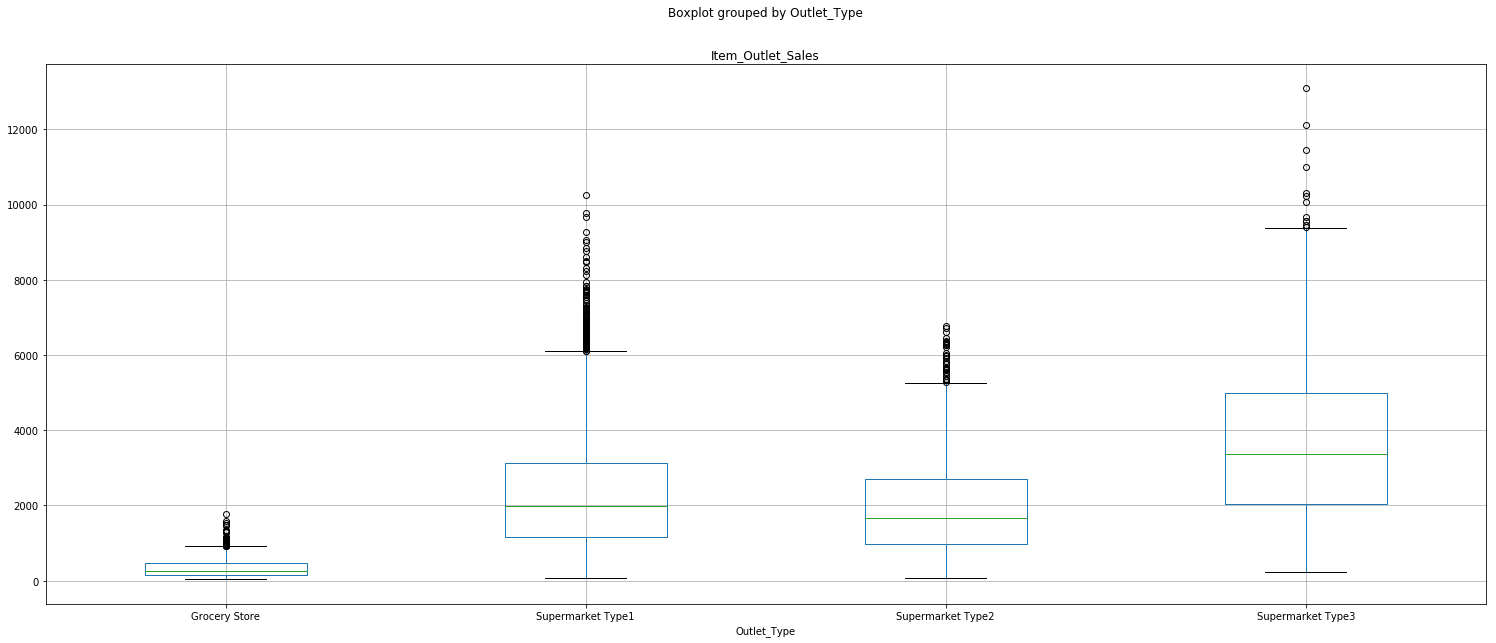

In [93]:
bm.boxplot(by='Outlet_Type',column='Item_Outlet_Sales',figsize=(25,10))

Woooooooooooooooooo we can draw a great conclusion for the outlet type and sales . Grocery store has least sale while supermarket3 has highest sale . Therefore sales  definitely depend on outlet type..

# Data Cleaning and Preprocessing data.

Here we will first seperate feature and target variable in different datsets from the training dataset

In [94]:
print(bm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None


In feature variable dataset we will exclude Item Identfier and outlet identifier as these are jst labels and have no impact on prediction of sales . And target variable will be Item_Outlet_Sales

In [95]:
X_TRAIN=bm.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis='columns')
y=bm[['Item_Outlet_Sales']]


In [96]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB
None


Here Outlet_Size is categorical and have some missing values so we will fill them with the most frequent entry in that column

In [97]:
print(X_TRAIN['Outlet_Size'].value_counts(dropna=False))

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [98]:
X_TRAIN['Outlet_Size']=X_TRAIN['Outlet_Size'].fillna('Medium')

In [99]:
print(X_TRAIN['Outlet_Size'].value_counts(dropna=False))

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [100]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB
None


Minimum value of Item_Visibility is 0.0000 which is not possible hence we will replace all 0 with mean of it

In [105]:
print(X_TRAIN['Item_Visibility'].value_counts())

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
0.076792      2
0.061425      2
0.023466      2
0.112399      2
0.159721      2
0.128296      2
0.093308      2
0.072411      2
0.074931      2
0.041355      2
0.071833      2
0.097457      2
0.136286      2
0.078759      2
0.080625      2
0.085622      2
0.013952      2
0.079806      2
0.106539      2
0.093914      2
0.014048      2
0.026895      2
0.080969      2
0.122016      2
0.072285      2
           ... 
0.021240      1
0.100641      1
0.030921      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.099024      1
0.052811      1
0.122735      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, L

In [106]:
X_TRAIN['Item_Visibility']=X_TRAIN['Item_Visibility'].replace(0.000000,np.mean(X_TRAIN['Item_Visibility']))

In [107]:
print(X_TRAIN['Item_Visibility'].value_counts())

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
0.076792      2
0.061425      2
0.023466      2
0.112399      2
0.159721      2
0.128296      2
0.093308      2
0.072411      2
0.074931      2
0.041355      2
0.071833      2
0.097457      2
0.136286      2
0.078759      2
0.080625      2
0.085622      2
0.013952      2
0.079806      2
0.106539      2
0.093914      2
0.014048      2
0.026895      2
0.080969      2
0.122016      2
0.072285      2
           ... 
0.021240      1
0.100641      1
0.030921      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.099024      1
0.052811      1
0.122735      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, L

In [109]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB
None


Now we have one column left with some missing values which should be filled as some ML model not accept missing values

In [113]:
print(X_TRAIN['Item_Weight'].value_counts(dropna=False))

NaN        1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
 15.100      68
 9.300       68
 16.700      66
 10.500      66
 19.350      63
 20.700      62
 16.000      62
 9.800       61
 17.700      60
 17.750      60
 18.850      59
 15.850      59
 15.000      59
 19.600      58
 16.750      58
 18.250      58
 15.700      57
 12.500      56
 9.195       56
 20.200      53
 10.195      53
 12.600      53
 12.100      53
 15.600      52
 13.500      51
           ... 
 7.260        3
 5.425        3
 5.845        3
 6.905        3
 7.565        3
 5.825        3
 5.305        3
 8.920        2
 7.890        2
 7.275        2
 4.905        2
 5.210        2
 6.400        2
 8.485        2
 6.775        2
 5.155        2
 7.605        2
 5.735        2
 6.325        2
 6.895        2
 7.560        2
 8.670        2
 6.405        2
 8.800        2
 5.885        2
 5.675        2
 9.420        1
 6.520        1
 7.685        1
 5.400        1
Name: Item_Weight, Lengt

In [118]:
X_TRAIN['Item_Weight']=X_TRAIN['Item_Weight'].replace(np.NaN,np.mean(X_TRAIN['Item_Weight']))

In [120]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB
None


There are some categorical columns which should be converted in numerical column using dummy variable

In [121]:
X_TRAIN=pd.get_dummies(X_TRAIN,drop_first=True)

In [122]:
print(X_TRAIN.head())

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.066132  182.0950                       1998   
4         8.93         0.066132   53.8614                       1987   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         1                         0   
1                         0                         1   
2                         1                         0   
3                         0                         1   
4                         1                         0   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Breads  \
0                         0                     0                 0   
1                         0                     0                 0   
2          

In [123]:
print(X_TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_reg               8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Type_Health and Hygiene       8523 non-null uint8
Item_Ty

Wooooooo we preprocessed our training dataset now we have neither missing values nor any categorical variable

# LINEAR REGRESSION

#  R square value of model

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X_TRAIN,y,test_size=0.25,random_state=42)
leg=LinearRegression()
leg.fit(X_train,y_train)
cross=cross_val_score(leg,X_TRAIN,y,cv=5)
print(leg.score(X_test,y_test))
print(np.mean(cross))

0.5670504764884454
0.5587143286323675


R square value of given model is 56% and  mean of 5 cross-validation R-square value is 55 % which is not good

# Predicting on test data

In [126]:
X_TS=pd.read_csv('datasets/Test_u94Q5KV.csv')

In [127]:
print(X_TS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


As we change the training dataset so that it has no missing value neither categorical features.

In [128]:
X_TS=X_TS.drop(['Item_Identifier','Outlet_Identifier'],axis='columns')

In [129]:
print(X_TS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 399.5+ KB
None


In [130]:
print(X_TS['Outlet_Size'].value_counts(dropna=False))

Medium    1862
NaN       1606
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [131]:
X_TS['Outlet_Size']=X_TS['Outlet_Size'].fillna('Medium')

In [132]:
print(X_TS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 399.5+ KB
None


Now we have one column left with some missing values which should be filled as some ML model not accept missing values . Her we will use imputing

In [137]:
X_TS['Item_Weight']=X_TS['Item_Weight'].replace(np.NaN,np.mean(X_TS['Item_Weight']))

In [138]:
print(X_TS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 30 columns):
Item_Weight                        5681 non-null float64
Item_Visibility                    5681 non-null float64
Item_MRP                           5681 non-null float64
Outlet_Establishment_Year          5681 non-null int64
Item_Fat_Content_Low Fat           5681 non-null uint8
Item_Fat_Content_Regular           5681 non-null uint8
Item_Fat_Content_low fat           5681 non-null uint8
Item_Fat_Content_reg               5681 non-null uint8
Item_Type_Breads                   5681 non-null uint8
Item_Type_Breakfast                5681 non-null uint8
Item_Type_Canned                   5681 non-null uint8
Item_Type_Dairy                    5681 non-null uint8
Item_Type_Frozen Foods             5681 non-null uint8
Item_Type_Fruits and Vegetables    5681 non-null uint8
Item_Type_Hard Drinks              5681 non-null uint8
Item_Type_Health and Hygiene       5681 non-null uint8
Item_Ty

We have categorical columns so we will convert them into numerical using dummy variables

In [136]:
X_TS=pd.get_dummies(X_TS,drop_first=True)
print(X_TS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 30 columns):
Item_Weight                        5681 non-null float64
Item_Visibility                    5681 non-null float64
Item_MRP                           5681 non-null float64
Outlet_Establishment_Year          5681 non-null int64
Item_Fat_Content_Low Fat           5681 non-null uint8
Item_Fat_Content_Regular           5681 non-null uint8
Item_Fat_Content_low fat           5681 non-null uint8
Item_Fat_Content_reg               5681 non-null uint8
Item_Type_Breads                   5681 non-null uint8
Item_Type_Breakfast                5681 non-null uint8
Item_Type_Canned                   5681 non-null uint8
Item_Type_Dairy                    5681 non-null uint8
Item_Type_Frozen Foods             5681 non-null uint8
Item_Type_Fruits and Vegetables    5681 non-null uint8
Item_Type_Hard Drinks              5681 non-null uint8
Item_Type_Health and Hygiene       5681 non-null uint8
Item_Ty

Now that we have both train and test data ready we can predict the result

In [139]:
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
lg.fit(X_TRAIN,y)
y_result=lg.predict(X_TS)

In [140]:
print(y_result)

[[1789.55884303]
 [1466.03283586]
 [1883.42802796]
 ...
 [1835.24573405]
 [3625.04225624]
 [1301.46745852]]


Woooooooooooo now we have prediction of Item_Outlet_Sales for the given test set but Linear model have very less R Square value so we will think of another model

# RIDGE REGRESSION

# HYPERPARAMETER TUNING ,R-SQUARE VALUE AND 5 FOLD CV R-Square Value

In [159]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
param_grid={'alpha':np.linspace(0,1,100)}
rdg=Ridge()
rdg_cv=GridSearchCV(rdg,param_grid,cv=5)
rdg_cv.fit(X_train,y_train)
cv=cross_val_score(rdg_cv,X_TRAIN,y,cv=5)
print(rdg_cv.best_params_)
print(rdg_cv.score(X_test,y_test))
print(np.mean(cv))

0.5670491766843326


Through hyperparameter modelling we get value of alpha to be 1 , R square value 56% and mean of 5 fold cross validation of R Square around 55% which is also not good .

In [160]:
rdg_cv.fit(X_TRAIN,y)
Y_RESULT=rdg_cv.predict(X_TS)
print(Y_RESULT)

[[1787.4127102 ]
 [1456.63257448]
 [1893.989618  ]
 ...
 [1846.36271598]
 [3615.25101286]
 [1312.55013462]]


Both ridge and linear regression have almost same R square value . 